# Clustering algorithms for customer segmentation

The dataset consists of Annual income of 303 customers and their total spend on an e-commerce site for a period of one year. Let us explore the data using numpy and pandas libraries in python.

In [31]:
#Load the required packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [32]:
#Plot styling
import seaborn as sns; sns.set()  # for plot styling
%matplotlib inline
plt.rcParams['figure.figsize'] = (16, 9)
plt.style.use('ggplot')


In [33]:
df = pd.read_csv('CLV.csv')


In [34]:
df.head()

,INCOME,SPEND
0,233,150
1,250,187
2,204,172
3,236,178
4,354,163


In [35]:
len(df)

303

# Descriptive statistics of Data set

In [36]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
INCOME,303.0,245.273927,48.499412,126.0,211.0,240.0,274.0,417.0
SPEND,303.0,149.646865,22.905161,71.0,133.5,153.0,166.0,202.0


In [37]:
df[["INCOME", "SPEND"]].groupby('SPEND').describe()


INCOME                                                            
       count        mean        std    min     25%    50%     75%    max
SPEND                                                                   
71       1.0  237.000000        NaN  237.0  237.00  237.0  237.00  237.0
88       1.0  274.000000        NaN  274.0  274.00  274.0  274.00  274.0
90       1.0  176.000000        NaN  176.0  176.00  176.0  176.00  176.0
95       1.0  282.000000        NaN  282.0  282.00  282.0  282.00  282.0
96       2.0  212.000000  48.083261  178.0  195.00  212.0  229.00  246.0
97       1.0  263.000000        NaN  263.0  263.00  263.0  263.00  263.0
99       1.0  267.000000        NaN  267.0  267.00  267.0  267.00  267.0
103      2.0  282.000000   1.414214  281.0  281.50  282.0  282.50  283.0
105      3.0  221.666667  39.627432  184.0  201.00  218.0  240.50  263.0
106      1.0  294.000000        NaN  294.0  294.00  294.0  294.00  294.0
108      2.0  246.000000  56.568542  206.0  226.00  246.0  266.00  286.0
109      2.0  294.000000  39.597980  266.0  280.00  294.0  308.00  322.0
111      3.0  237.666667  28.360771  217.0  221.50  226.0  248.00  270.0
112      2.0  272.500000   4.949747  269.0  270.75  272.5  274.25  276.0
113      1.0  188.000000        NaN  188.0  188.00  188.0  188.00  188.0
114      3.0  206.000000  33.778692  167.0  196.00  225.0  225.50  226.0
115      3.0  186.000000  47.696960  131.0  171.00  211.0  213.50  216.0
116      2.0  241.500000  62.932504  197.0  219.25  241.5  263.75  286.0
117      1.0  327.000000        NaN  327.0  327.00  327.0  327.00  327.0
118      1.0  275.000000        NaN  275.0  275.00  275.0  275.00  275.0
120      3.0  244.666667  67.009950  177.0  211.50  246.0  278.50  311.0
121      1.0  269.000000        NaN  269.0  269.00  269.0  269.00  269.0
122      4.0  278.500000  26.413380  248.0  260.75  281.5  299.25  303.0
123      2.0  208.000000  46.669048  175.0  191.50  208.0  224.50  241.0
124      1.0  289.000000        NaN  289.0  289.00  289.0  289.00  289.0
125      7.0  227.000000  68.134671  149.0  170.00  213.0  286.00  315.0
126      4.0  197.250000  36.935755  149.0  187.25  200.5  210.50  239.0
127      1.0  254.000000        NaN  254.0  254.00  254.0  254.00  254.0
128      1.0  243.000000        NaN  243.0  243.00  243.0  243.00  243.0
129      1.0  229.000000        NaN  229.0  229.00  229.0  229.00  229.0
...      ...         ...        ...    ...     ...    ...     ...    ...
162     11.0  253.363636  51.581533  177.0  201.50  271.0  298.50  315.0
163      9.0  249.222222  52.975885  196.0  209.00  233.0  269.00  354.0
164      2.0  226.500000   7.778175  221.0  223.75  226.5  229.25  232.0
165      5.0  222.800000   9.984989  211.0  213.00  228.0  230.00  232.0
166      3.0  287.000000  49.789557  245.0  259.50  274.0  308.00  342.0
167      1.0  267.000000        NaN  267.0  267.00  267.0  267.00  267.0
168      5.0  212.000000  11.335784  198.0  207.00  212.0  214.00  229.0
169      6.0  247.333333  46.987942  196.0  223.75  233.0  261.75  330.0
170      5.0  268.000000  46.459660  215.0  220.00  293.0  304.00  308.0
171      4.0  263.250000  26.849891  240.0  245.25  256.5  274.50  300.0
172      7.0  267.142857  53.161479  204.0  228.00  268.0  301.00  340.0
173      8.0  214.625000  55.495013  126.0  175.00  216.5  250.25  299.0
174      5.0  212.000000  46.669048  168.0  182.00  192.0  236.00  282.0
175      3.0  210.000000  60.671245  141.0  187.50  234.0  244.50  255.0
177      1.0  197.000000        NaN  197.0  197.00  197.0  197.00  197.0
178      5.0  240.600000  36.301515  199.0  226.00  236.0  244.00  298.0
179      5.0  226.000000  27.586228  195.0  199.00  233.0  250.00  253.0
180      2.0  240.000000   7.071068  235.0  237.50  240.0  242.50  245.0
181      2.0  263.000000  56.568542  223.0  243.00  263.0  283.00  303.0
182      5.0  232.600000  66.081768  157.0  183.00  231.0  271.00  321.0
184      1.0  205.000000        NaN  205.0  205.00  205.0  205.0

### The dataset consists of 303 rows. The mean annual income is 245000 and the mean annual spend is 149000. 

# Visualizing data

Text(0.5, 0, 'Income / spend')

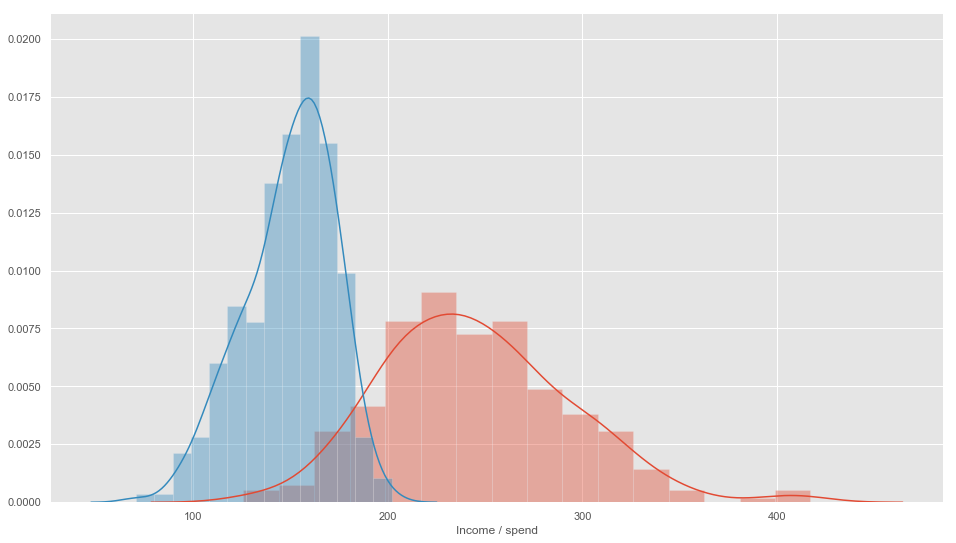

In [45]:
#Visualizing the data - displot
plot_income = sns.distplot(df["INCOME"])
plot_spend = sns.distplot(df["SPEND"])
plt.xlabel('Income / spend')

[(0, 420)]

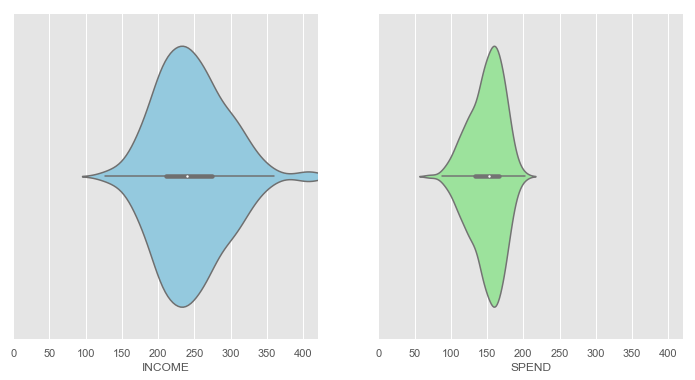

In [46]:
#Violin plot of Income and Spend
f, axes = plt.subplots(1,2, figsize=(12,6), sharex=True, sharey=True)
v1 = sns.violinplot(data=df, x='INCOME', color="skyblue",ax=axes[0])
v2 = sns.violinplot(data=df, x='SPEND',color="lightgreen", ax=axes[1])
v1.set(xlim=(0,420))

# Clustering fundamentals
Clustering is an unsupervised machine learning technique, where there are no defined dependent and independent variables. The patterns in the data are used to identify / group similar observations. members of a group are very similar, and members of different groups are extremely dissimilar.

# K-Means clustering
K-means clustering is an iterative clustering algorithm where the number of clusters K is predetermined and the algorithm iteratively assigns each data point to one of the K clusters based on the feature similarity.

# Deciding on the optimum number of clusters ‘K’

The main input for k-means clustering is the number of clusters. This is derived using the concept of minimizing within cluster sum of square (WCSS). A scree plot is created which plots the number of clusters in the X axis and the WCSS for each cluster number in the y-axis.


As the number of clusters increase, the WCSS keeps decreasing. The decrease of WCSS is initially steep and then the rate of decrease slows down resulting in an elbow plot. The number of clusters at the elbow formation usually gives an indication on the optimum number of clusters. This combined with specific knowledge of the business requirement should be used to decide on the optimum number of clusters.


For our dataset, we will arrive at the optimum number of clusters using the elbow method:

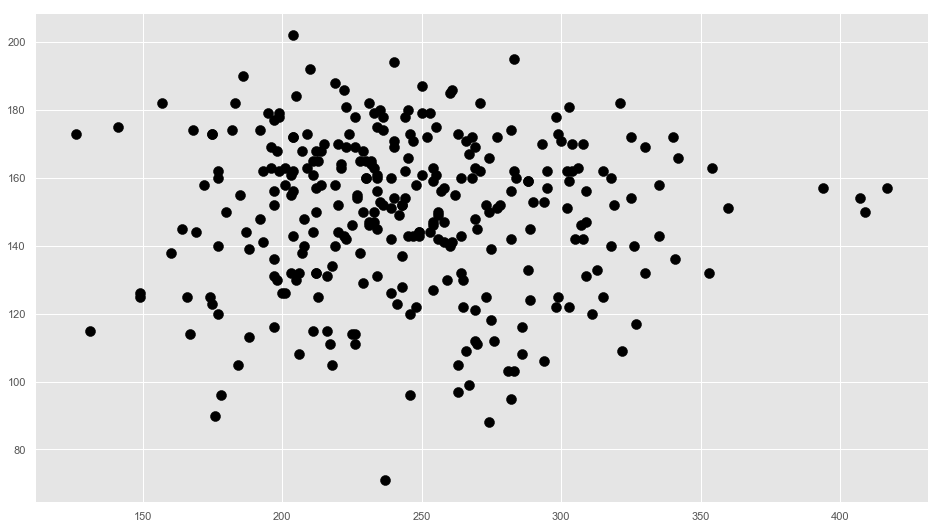

In [80]:
# Plotting the values to understand the spread
Income = df['INCOME'].values
Spend = df['SPEND'].values
X = np.array(list(zip(Income, Spend)))
plt.scatter(Income, Spend, c='black', s=100)

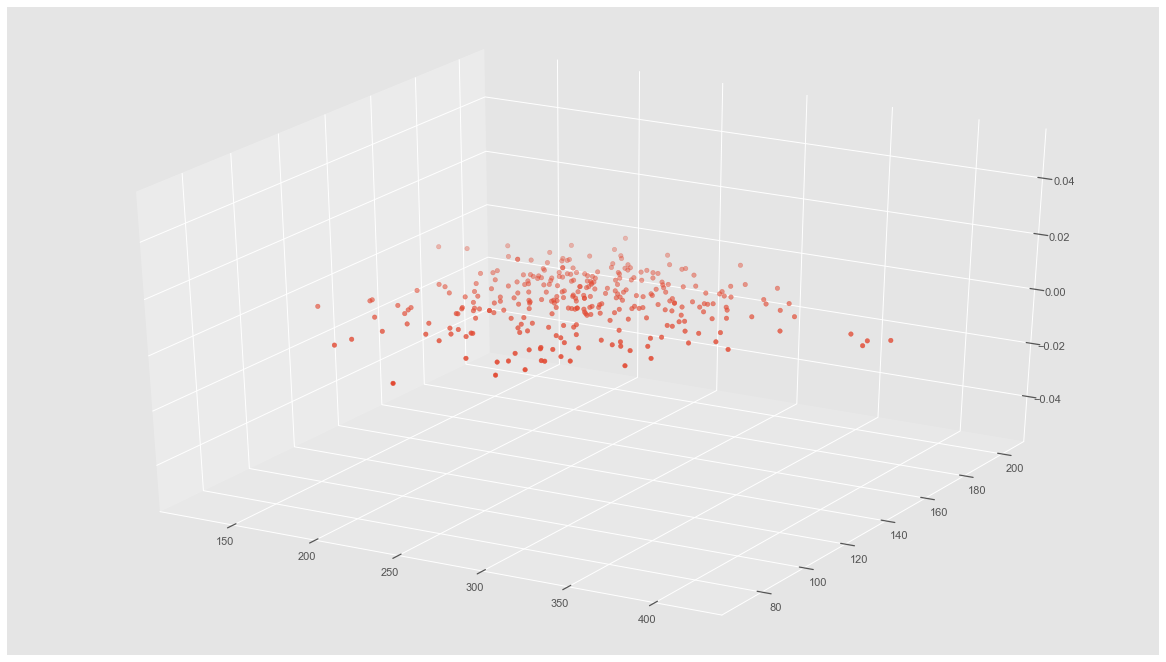

In [58]:
##plot in 3D space
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(X[:, 0], X[:, 1])



In [60]:
# clustering fundamentals


In [63]:
X=df.iloc[:,[0,1]].values


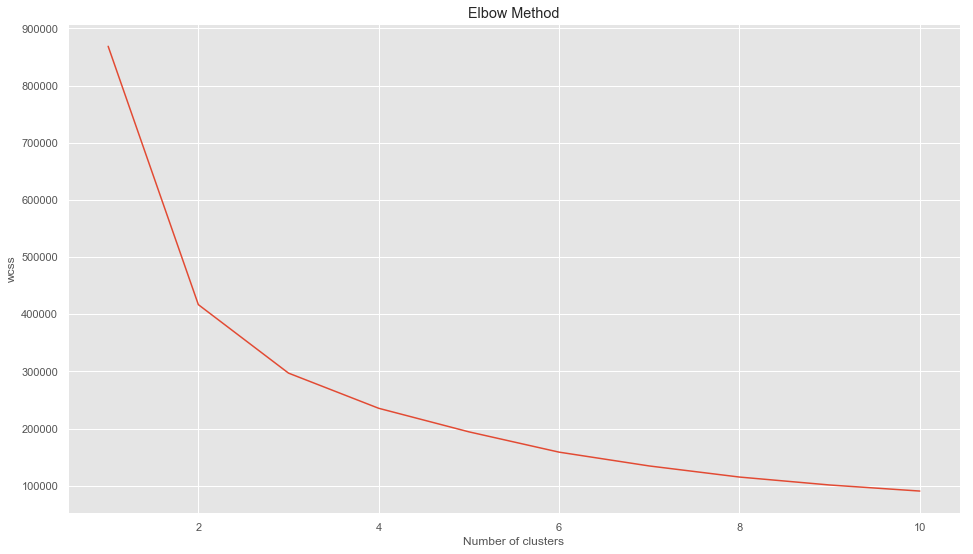

In [64]:

#Using the elbow method to find the ideal number of clusters
from sklearn.cluster import KMeans
wcss = []
for i in range(1,11):
    km=KMeans(n_clusters=i,init='k-means++', max_iter=300, n_init=10, random_state=0)
    km.fit(X)
    wcss.append(km.inertia_)
plt.plot(range(1,11),wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('wcss')
plt.show()



In [66]:
#Calculating the silhoutte coefficient
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans



for n_cluster in range(2, 11):
    kmeans = KMeans(n_clusters=n_cluster).fit(X)
    label = kmeans.labels_
    sil_coeff = silhouette_score(X, label, metric='euclidean')
    print("For n_clusters={}, The Silhouette Coefficient is {}".format(n_cluster, sil_coeff))

For n_clusters=2, The Silhouette Coefficient is 0.44006694211403197
For n_clusters=3, The Silhouette Coefficient is 0.35962629048722355
For n_clusters=4, The Silhouette Coefficient is 0.35271446789203426
For n_clusters=5, The Silhouette Coefficient is 0.36210339735856734
For n_clusters=6, The Silhouette Coefficient is 0.367075543561368
For n_clusters=7, The Silhouette Coefficient is 0.36200937210034045
For n_clusters=8, The Silhouette Coefficient is 0.3601303767766271
For n_clusters=9, The Silhouette Coefficient is 0.3581733057044917
For n_clusters=10, The Silhouette Coefficient is 0.34234638256794525


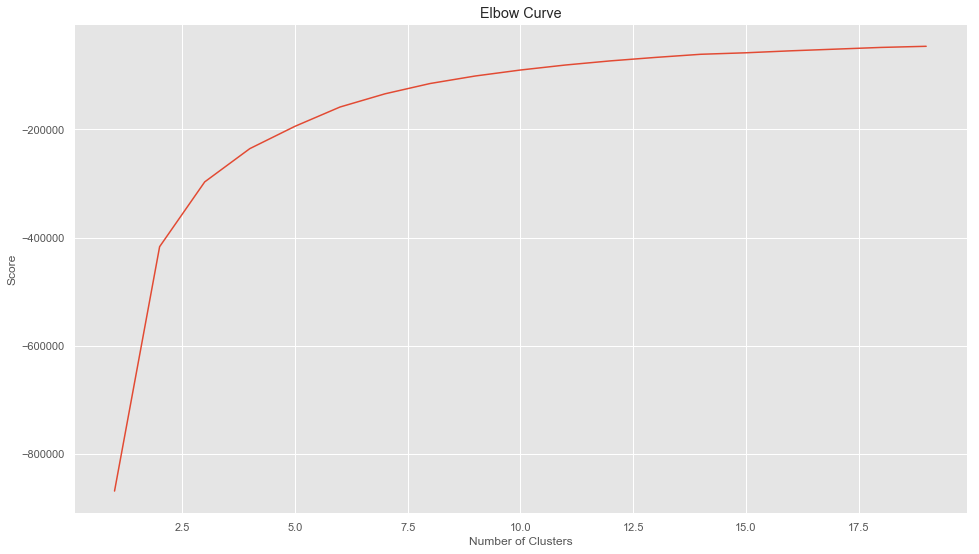

[-868805.478547855, -416914.67764462164, -297101.3764201936, -235618.7799755974, -194388.74977425064, -158665.25572181412, -134205.04000485258, -115166.08708514448, -101289.24590143532, -90262.31124478435, -80984.96379433415, -73319.21563789158, -66921.34668316742, -61139.34604800827, -58372.48896157148, -54722.954750863144, -51594.86658789224, -48455.753258663106, -46374.38415908836]


In [67]:
import pylab as pl
from sklearn.decomposition import PCA

Nc = range(1, 20)
kmeans = [KMeans(n_clusters=i) for i in Nc]
kmeans
score = [kmeans[i].fit(X).score(X) for i in range(len(kmeans))]
score
pl.plot(Nc,score)
pl.xlabel('Number of Clusters')
pl.ylabel('Score')
pl.title('Elbow Curve')
pl.show()

print(score)

In [68]:


for k in range (1, 11):
    kmeans_model = KMeans(n_clusters=k, random_state=1).fit(X)
    labels = kmeans_model.labels_
    interia = kmeans_model.inertia_
    print ("k:",k, " cost:", interia)
print()



k: 1  cost: 868805.4785478548
k: 2  cost: 416914.67764462065
k: 3  cost: 297101.3764201943
k: 4  cost: 235568.75630353513
k: 5  cost: 193333.51167275637
k: 6  cost: 158999.20745160058
k: 7  cost: 135314.10167803388
k: 8  cost: 115686.57935998778
k: 9  cost: 102546.93727877043
k: 10  cost: 91556.28599714936



In [70]:
##Fitting kmeans to the dataset
km4=KMeans(n_clusters=4,init='k-means++', max_iter=300, n_init=10, random_state=0)
y_means = km4.fit_predict(X)

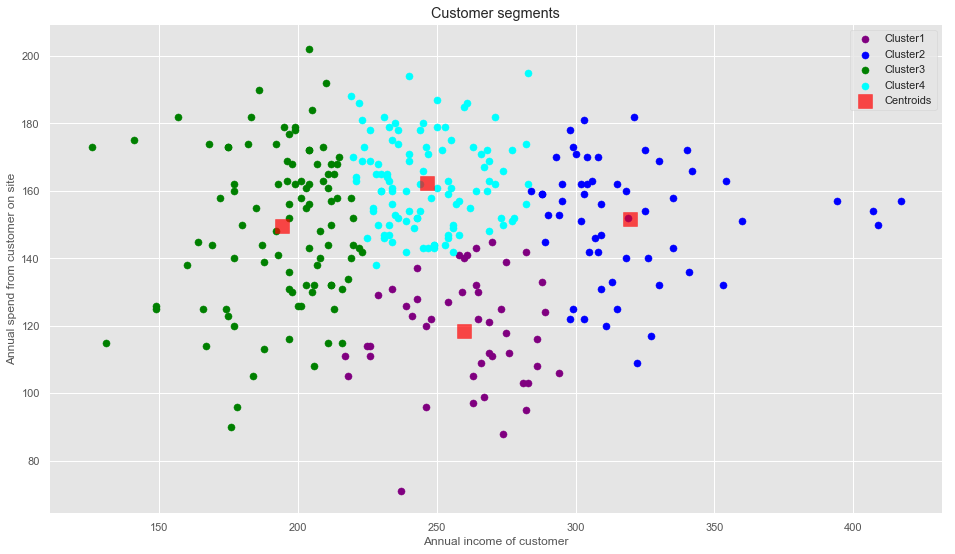

In [71]:
#Visualising the clusters for k=4
plt.scatter(X[y_means==0,0],X[y_means==0,1],s=50, c='purple',label='Cluster1')
plt.scatter(X[y_means==1,0],X[y_means==1,1],s=50, c='blue',label='Cluster2')
plt.scatter(X[y_means==2,0],X[y_means==2,1],s=50, c='green',label='Cluster3')
plt.scatter(X[y_means==3,0],X[y_means==3,1],s=50, c='cyan',label='Cluster4')

plt.scatter(km4.cluster_centers_[:,0], km4.cluster_centers_[:,1],s=200,marker='s', c='red', alpha=0.7, label='Centroids')
plt.title('Customer segments')
plt.xlabel('Annual income of customer')
plt.ylabel('Annual spend from customer on site')
plt.legend()
plt.show()

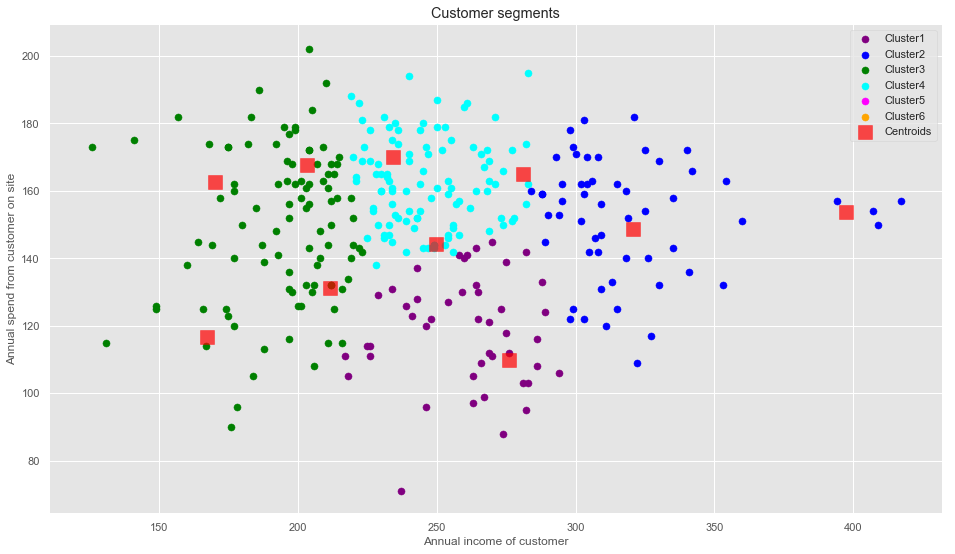

In [72]:
#Visualising the clusters
plt.scatter(X[y_means==0,0],X[y_means==0,1],s=50, c='purple',label='Cluster1')
plt.scatter(X[y_means==1,0],X[y_means==1,1],s=50, c='blue',label='Cluster2')
plt.scatter(X[y_means==2,0],X[y_means==2,1],s=50, c='green',label='Cluster3')
plt.scatter(X[y_means==3,0],X[y_means==3,1],s=50, c='cyan',label='Cluster4')
plt.scatter(X[y_means==4,0],X[y_means==4,1],s=50, c='magenta',label='Cluster5')
plt.scatter(X[y_means==5,0],X[y_means==5,1],s=50, c='orange',label='Cluster6')

plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:,1],s=200,marker='s', c='red', alpha=0.7, label='Centroids')
plt.title('Customer segments')
plt.xlabel('Annual income of customer')
plt.ylabel('Annual spend from customer on site')
plt.legend()
plt.show()

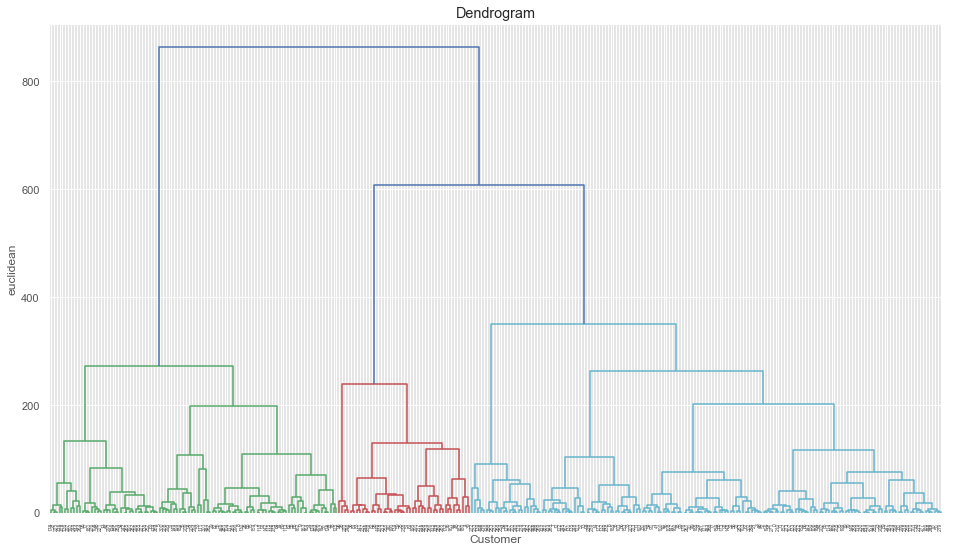

In [77]:
# Using the dendrogram to find the optimal number of clusters
import scipy.cluster.hierarchy as sch
dend=sch.dendrogram(sch.linkage(X, method='ward'))
plt.title("Dendrogram")
plt.xlabel('Customer')
plt.ylabel('euclidean')
plt.show()